In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [14]:
df = pd.read_csv('exam_data.csv')

In [16]:
df.head()

,cgpa,exam_marks,placement
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9556\4135928621.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False)


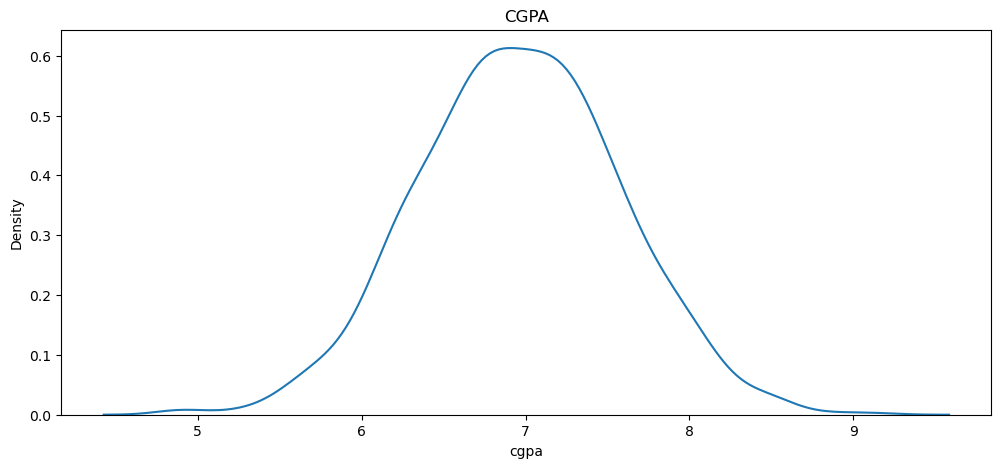

In [22]:

plt.figure(figsize=(12,5))
plt.title('CGPA')
sns.distplot(df['cgpa'],hist=False)

plt.show()

C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9556\1214438853.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['exam_marks'],hist=False)


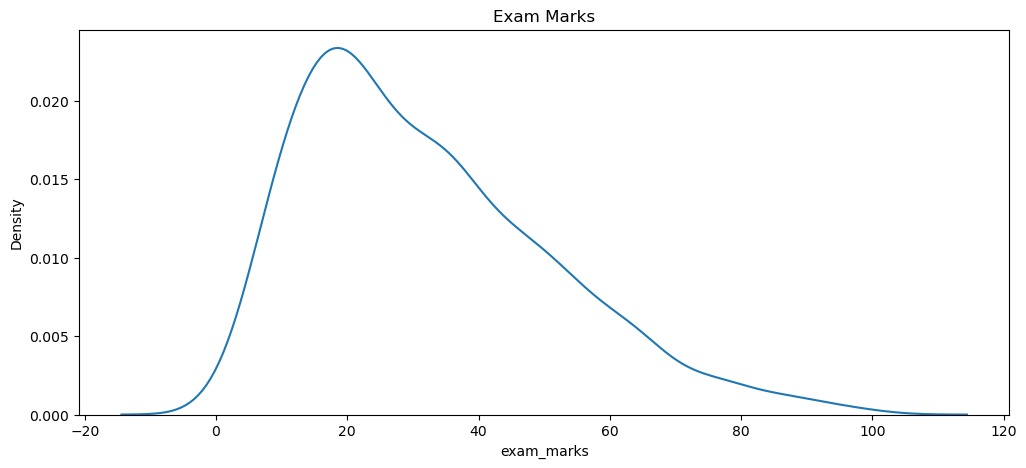

In [26]:

plt.figure(figsize=(12,5))
plt.title('Exam Marks')
sns.distplot(df['exam_marks'],hist=False)

plt.show()

In [28]:
df['cgpa'].skew()

-0.014529938929314918

In [34]:
upper_limit = df['cgpa'].mean() + 3*(df['cgpa'].std())
lower_limit = df['cgpa'].mean() - 3*(df['cgpa'].std())

In [36]:
print(f"Upper Limit: {upper_limit}")
print(f"Lower Limit: {lower_limit}")

Upper Limit: 8.808933625397168
Lower Limit: 5.113546374602832


In [38]:
df[(df['cgpa'] >upper_limit ) | (df['cgpa'] <lower_limit)]

,cgpa,exam_marks,placement
485,4.92,44,1
995,8.87,44,1
996,9.12,65,1
997,4.89,34,0
999,4.90,10,1


In [47]:
# Trimming:

df_trim = df[(df['cgpa'] <=upper_limit) & (df['cgpa'] >=lower_limit)]


C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9556\1412910780.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'],hist=False)
C:\Users\lab4.LAB4PR\AppData\Local\Temp\ipykernel_9556\1412910780.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_trim['cgpa'],his

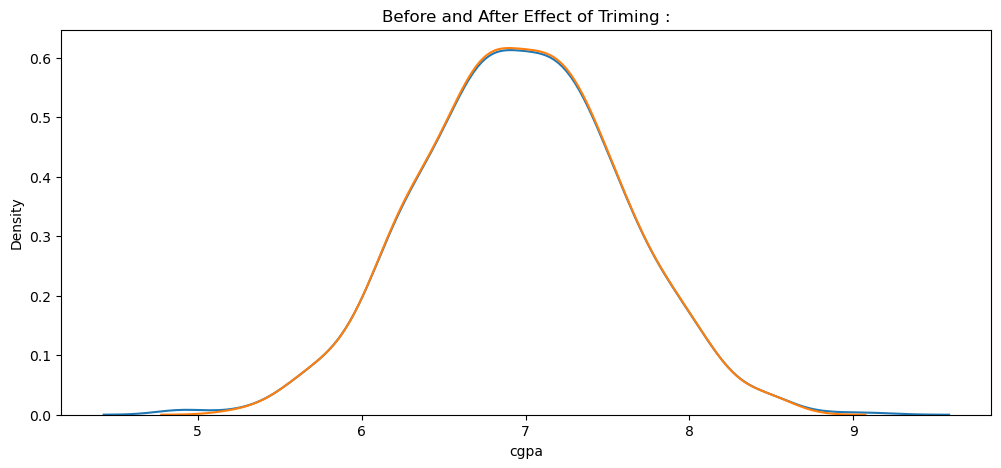

In [49]:
plt.figure(figsize=(12,5))

plt.title('Before and After Effect of Triming :')

sns.distplot(df['cgpa'],hist=False)
sns.distplot(df_trim['cgpa'],hist=False)

plt.show()

In [51]:
df.describe()

,cgpa,exam_marks,placement
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [53]:
df_trim.describe()

,cgpa,exam_marks,placement
count,995.000000,995.000000,995.000000
mean,6.963357,32.188945,0.487437
std,0.600082,19.130298,0.500094
min,5.230000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.365000,44.000000,1.000000
max,8.620000,100.000000,1.000000


In [ ]:
# Z-score:

# xi - mean / std()

In [57]:
df['new_cgpa'] = (df['cgpa'] - df['cgpa'].mean()) /df['cgpa'].std()

In [59]:
df.head()

,cgpa,exam_marks,placement,new_cgpa
0,7.19,26,1,0.371425
1,7.46,38,1,0.809810
2,7.54,40,1,0.939701
3,6.42,8,1,-0.878782
4,7.23,17,0,0.436371


In [69]:
df[(df['new_cgpa'] > 3) | (df['new_cgpa'] <-3)]

,cgpa,exam_marks,placement,new_cgpa
485,4.92,44,1,-3.314251
995,8.87,44,1,3.099150
996,9.12,65,1,3.505062
997,4.89,34,0,-3.362960
999,4.90,10,1,-3.346724


In [86]:
# Capping:

df['cgpa'] = np.where(df['cgpa'] > upper_limit,upper_limit,
        np.where(df['cgpa'] <lower_limit ,lower_limit,
                df['cgpa']))

In [82]:
df['cgpa'].min()

5.113546374602832

In [84]:
df.describe()

,cgpa,exam_marks,placement,new_cgpa
count,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,6.961499,32.225000,0.489000,-1.474376e-16
std,0.612688,19.130822,0.500129,1.000000e+00
min,5.113546,0.000000,0.000000,-3.362960e+00
25%,6.550000,17.000000,0.000000,-6.677081e-01
50%,6.960000,28.000000,0.000000,-2.013321e-03
75%,7.370000,44.000000,1.000000,6.636815e-01
max,8.808934,100.000000,1.000000,3.505062e+00
